# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_PLNMobile_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-06-14 13:49:34,"sangat bermanfaat, cepat ditanggapi, lengkap"
1,Pengguna Google,5,2024-06-14 13:43:44,"Pelayanan maksimal,Respon cepat dan aplikasi s..."
2,Pengguna Google,5,2024-06-14 13:43:11,Sangat cepat dang tanggap
3,Pengguna Google,5,2024-06-14 13:41:26,"Cepat responnya,makasih PLN"
4,Pengguna Google,5,2024-06-14 13:41:20,PLN mantap sekali


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"sangat bermanfaat, cepat ditanggapi, lengkap",Pengguna Google,2024-06-14 13:49:34
1,"Pelayanan maksimal,Respon cepat dan aplikasi s...",Pengguna Google,2024-06-14 13:43:44
2,Sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,"Cepat responnya,makasih PLN",Pengguna Google,2024-06-14 13:41:26
4,PLN mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4995,PLN terbaik dan sukses,Marthinus Riry,2024-06-10 00:15:54
4996,Aplikasi yg sangat membantu,Sabri Hadi,2024-06-10 00:12:26
4997,Pln mobeli terbaik dan terpercaya,Piti Coy,2024-06-10 00:10:53
4998,"Apilaksi Yang Sangat membantu,Terbaik👍",Akbar Saputra,2024-06-10 00:09:24


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   5000 non-null   object
 1   userName  5000 non-null   object
 2   at        5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,5000,5000,5000
unique,4079,500,4949
top,Mantap,Pengguna Google,2024-06-13 11:27:46
freq,85,4501,2


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(5000, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(4079, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,sangat bermanfaat cepat ditanggapi lengkap,Pengguna Google,2024-06-14 13:49:34
1,pelayanan maksimalrespon cepat dan aplikasi sa...,Pengguna Google,2024-06-14 13:43:44
2,sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,cepat responnyamakasih pln,Pengguna Google,2024-06-14 13:41:26
4,pln mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4993,cepat respon dan top apliksinya,Sabrina Rina,2024-06-10 00:17:15
4995,pln terbaik dan sukses,Marthinus Riry,2024-06-10 00:15:54
4997,pln mobeli terbaik dan terpercaya,Piti Coy,2024-06-10 00:10:53
4998,apilaksi yang sangat membantuterbaik,Akbar Saputra,2024-06-10 00:09:24


# **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,sangat bermanfaat cepat ditanggapi lenggaap,Pengguna Google,2024-06-14 13:49:34
1,pelayanan maksimalrespon cepat dan aplikasi sa...,Pengguna Google,2024-06-14 13:43:44
2,sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,cepat responnyamakasih pln,Pengguna Google,2024-06-14 13:41:26
4,pln mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4993,cepat respon dan top apliksinya,Sabrina Rina,2024-06-10 00:17:15
4995,pln terbaik dan sukses,Marthinus Riry,2024-06-10 00:15:54
4997,pln mobile terbaik dan terpercaya,Piti Coy,2024-06-10 00:10:53
4998,apilaksi yang sangat membantuterbaik,Akbar Saputra,2024-06-10 00:09:24


# **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,sangat bermanfaat cepat ditanggapi lenggaap,Pengguna Google,2024-06-14 13:49:34
1,pelayanan maksimalrespon cepat aplikasi sangat...,Pengguna Google,2024-06-14 13:43:44
2,sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,cepat responnyamakasih pln,Pengguna Google,2024-06-14 13:41:26
4,pln mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4993,cepat respon top apliksinya,Sabrina Rina,2024-06-10 00:17:15
4995,pln terbaik sukses,Marthinus Riry,2024-06-10 00:15:54
4997,pln mobile terbaik terpercaya,Piti Coy,2024-06-10 00:10:53
4998,apilaksi sangat membantuterbaik,Akbar Saputra,2024-06-10 00:09:24


# **Tokenize**

In [19]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [sangat, bermanfaat, cepat, ditanggapi, lenggaap]
1       [pelayanan, maksimalrespon, cepat, aplikasi, s...
2                          [sangat, cepat, dang, tanggap]
3                          [cepat, responnyamakasih, pln]
4                                   [pln, mantap, sekali]
                              ...                        
4993                     [cepat, respon, top, apliksinya]
4995                               [pln, terbaik, sukses]
4997                   [pln, mobile, terbaik, terpercaya]
4998                  [apilaksi, sangat, membantuterbaik]
4999    [pln, terbaik, app, sangat, berguna, laporan, ...
Name: content, Length: 4079, dtype: object

# **Stemming**

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PLNMobile_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PLNMobile_1.csv', encoding = 'latin1')
df_clean

,content
0,sangat manfaat cepat tanggap lenggaap
1,layan maksimalrespon cepat aplikasi sangat aku...
2,sangat cepat dang tanggap
3,cepat responnyamakasih pln
4,pln mantap sekali
...,...
4074,cepat respon top apliksinya
4075,pln baik sukses
4076,pln mobile baik percaya
4077,apilaksi sangat membantuterbaik


# **Translate**

In [22]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
# Load Data Hasil Stemming

df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PLNMobile_1.csv', encoding='latin1')

In [25]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 2.86MB/s]                   


In [27]:
# Imputing NaN Values

df2 = df_clean.fillna(method = 'pad')
df2

,content
0,sangat manfaat cepat tanggap lenggaap
1,layan maksimalrespon cepat aplikasi sangat aku...
2,sangat cepat dang tanggap
3,cepat responnyamakasih pln
4,pln mantap sekali
...,...
4074,cepat respon top apliksinya
4075,pln baik sukses
4076,pln mobile baik percaya
4077,apilaksi sangat membantuterbaik


In [28]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PLNMobile_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PLNMobile_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...
1,1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...
2,2,sangat cepat dang tanggap,"Very quick, very alert."
3,3,cepat responnyamakasih pln,fast response thank you very much
4,4,pln mantap sekali,It's great.
...,...,...,...
4074,4074,cepat respon top apliksinya,quickly respond to the top application
4075,4075,pln baik sukses,good success
4076,4076,pln mobile baik percaya,Have a good mobile believe
4077,4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PLNMobile_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...
1,1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...
2,2,sangat cepat dang tanggap,"Very quick, very alert."
3,3,cepat responnyamakasih pln,fast response thank you very much
4,4,pln mantap sekali,It's great.
...,...,...,...
4074,4074,cepat respon top apliksinya,quickly respond to the top application
4075,4075,pln baik sukses,good success
4076,4076,pln mobile baik percaya,Have a good mobile believe
4077,4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 2911
Netral = 1037
Negatif = 131

Total Data Seluruhnya : 4079


In [34]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,Positif
1,1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,Positif
2,2,sangat cepat dang tanggap,"Very quick, very alert.",Positif
3,3,cepat responnyamakasih pln,fast response thank you very much,Positif
4,4,pln mantap sekali,It's great.,Positif
...,...,...,...,...
4074,4074,cepat respon top apliksinya,quickly respond to the top application,Positif
4075,4075,pln baik sukses,good success,Positif
4076,4076,pln mobile baik percaya,Have a good mobile believe,Positif
4077,4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,Positif


In [35]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,Positif
1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,Positif
2,sangat cepat dang tanggap,"Very quick, very alert.",Positif
3,cepat responnyamakasih pln,fast response thank you very much,Positif
4,pln mantap sekali,It's great.,Positif
...,...,...,...
4074,cepat respon top apliksinya,quickly respond to the top application,Positif
4075,pln baik sukses,good success,Positif
4076,pln mobile baik percaya,Have a good mobile believe,Positif
4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



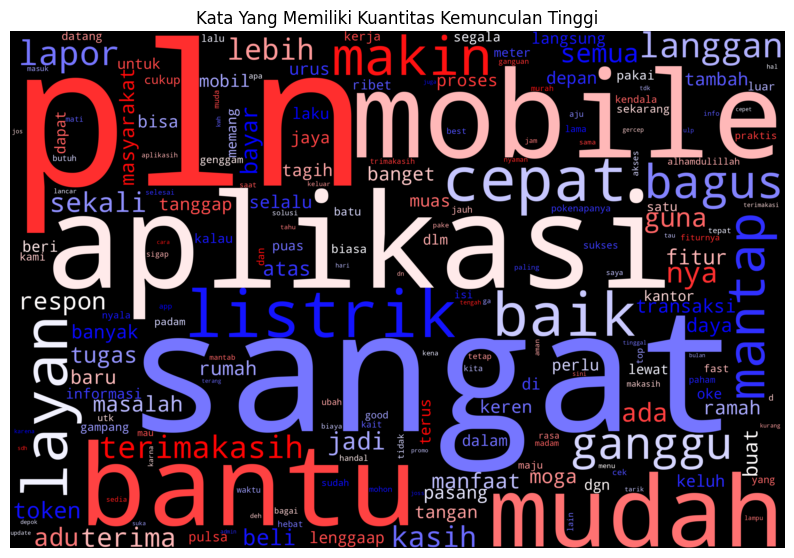

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


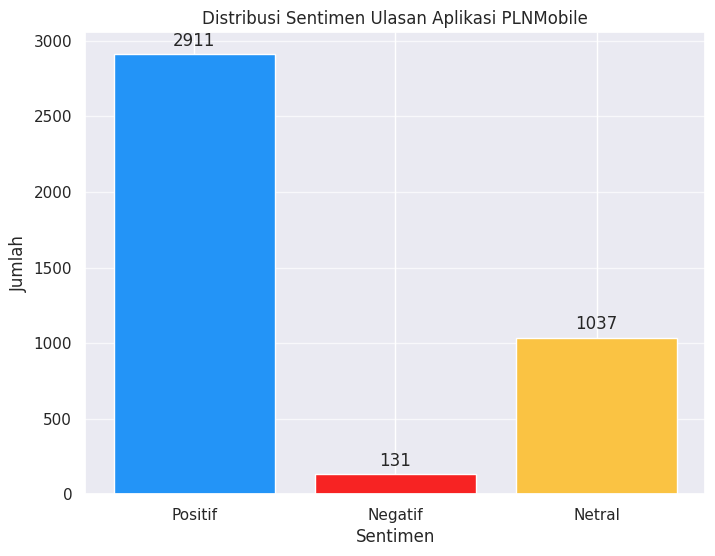

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")


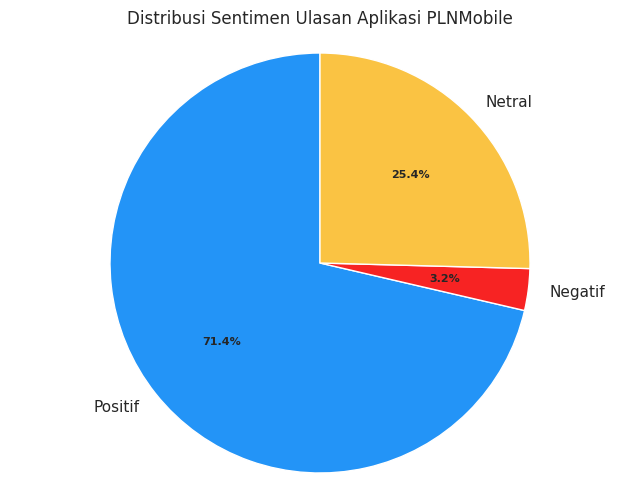

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")

In [39]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,Positif
1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,Positif
2,sangat cepat dang tanggap,"Very quick, very alert.",Positif
3,cepat responnyamakasih pln,fast response thank you very much,Positif
4,pln mantap sekali,It's great.,Positif
...,...,...,...
4074,cepat respon top apliksinya,quickly respond to the top application,Positif
4075,pln baik sukses,good success,Positif
4076,pln mobile baik percaya,Have a good mobile believe,Positif
4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,Positif


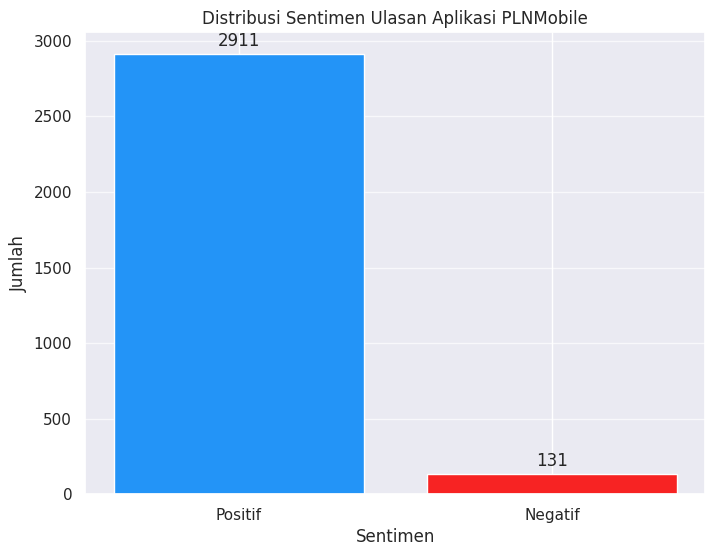

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")


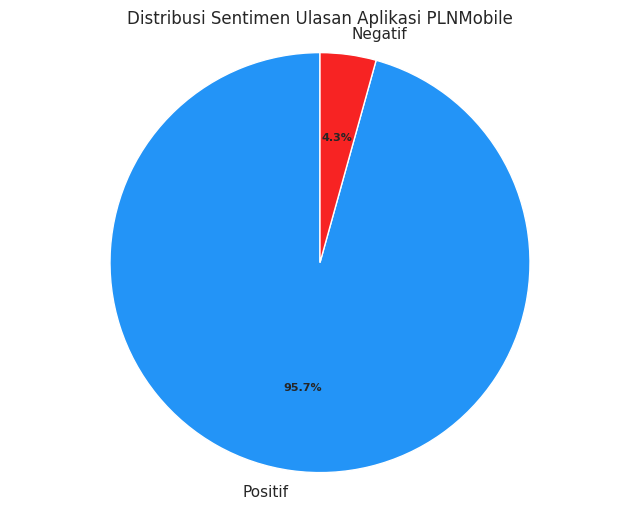

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")

In [42]:
# Replace Data Sentimen

data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,1
1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,1
2,sangat cepat dang tanggap,"Very quick, very alert.",1
3,cepat responnyamakasih pln,fast response thank you very much,1
4,pln mantap sekali,It's great.,1
...,...,...,...
4074,cepat respon top apliksinya,quickly respond to the top application,1
4075,pln baik sukses,good success,1
4076,pln mobile baik percaya,Have a good mobile believe,1
4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,1


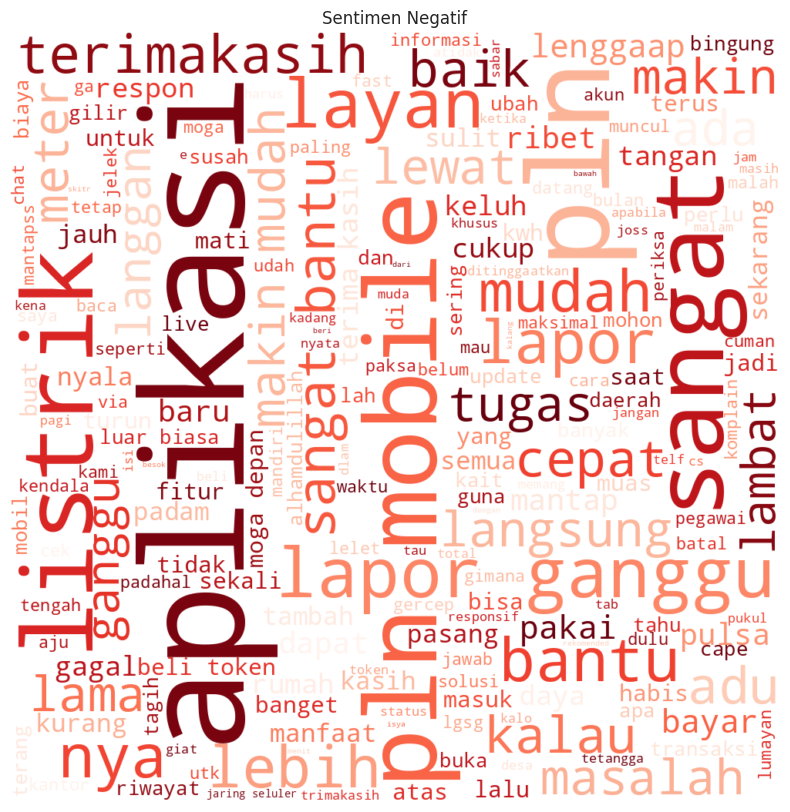

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

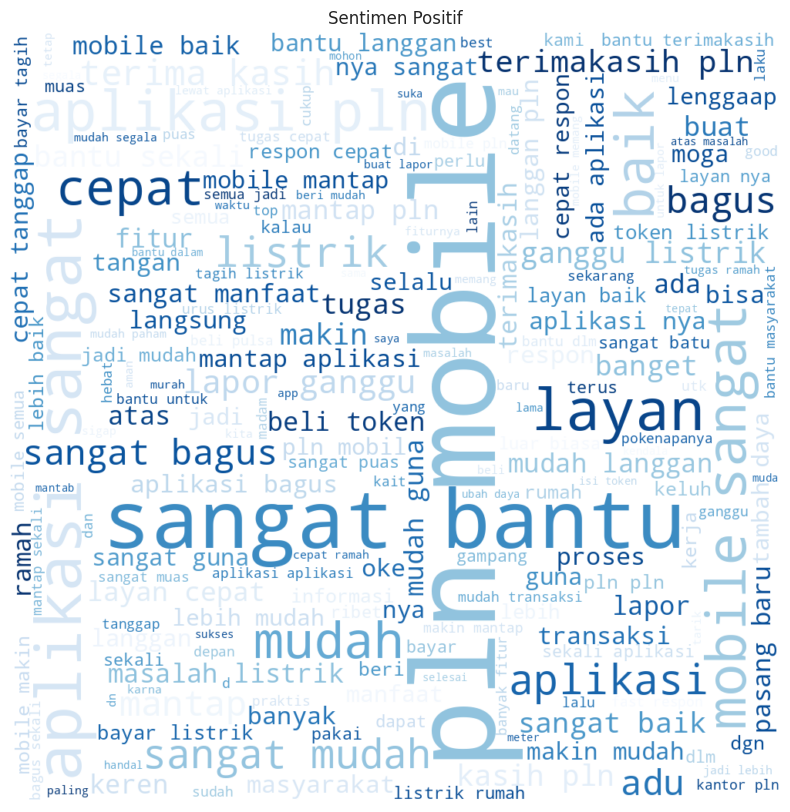

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif

data['sentimen'].value_counts()

sentimen
1    2911
0     131
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [46]:
# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Melakukan oversampling SMOTE pada data latih [ Oversampling dengan SMOTE ]

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

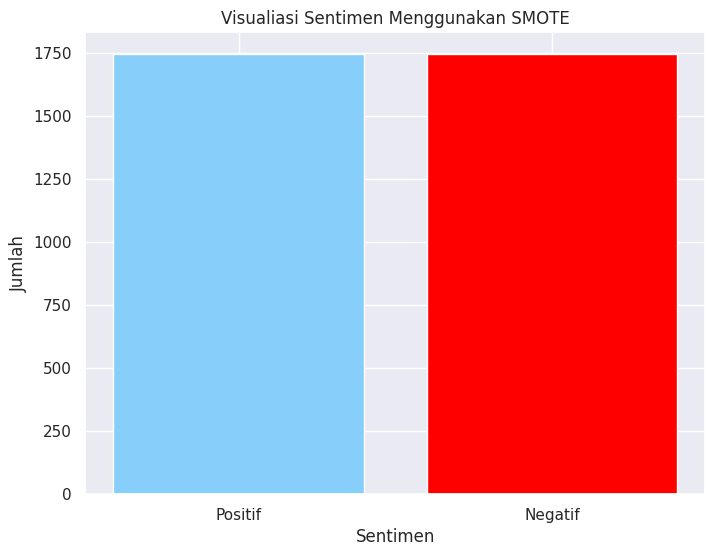

In [53]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Data Mining**

In [58]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [60]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [62]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8537387017255547

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.11      0.35      0.17        51
     Positif       0.97      0.88      0.92      1166

    accuracy                           0.85      1217
   macro avg       0.54      0.61      0.54      1217
weighted avg       0.93      0.85      0.89      1217



In [64]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nTrue Positives (TP) = ', cm[1, 1])

print('\nFalse Negatives (FN) = ', cm[0, 1])

print('\nFalse Positives (FP) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[  18   33]
 [ 145 1021]]

True Negatives (TN) =  18

True Positives (TP) =  1021

False Negatives (FN) =  33

False Positives (FP) =  145

Accuracy =  0.8537387017255547


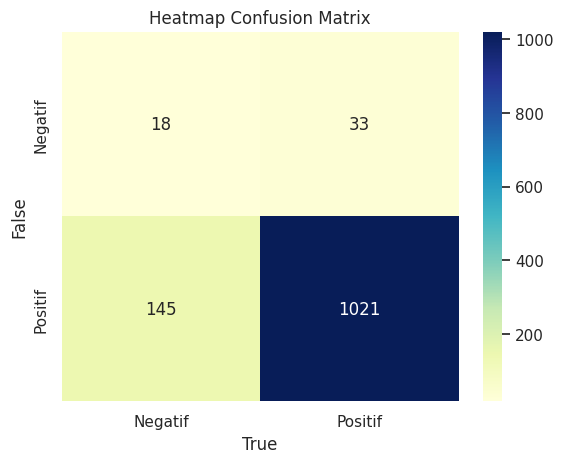

In [69]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Negatif', 'Positif'],
                         index=['Negatif', 'Positif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('True')
plt.ylabel('False')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [70]:
# Slicing Confusion Matrix

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

In [71]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8537


In [72]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1463


# **Testing**

In [73]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Aplikasi yang sangat user- friendly, Informatif dan fleksibel, sangat Recommended sekali biar ngurusin masalah kelistrikan gak pakai ribet. Kalau ada kendala pengaduan lewat aplikasi juga sangat fast response. Service pelanggannya maksimal. Aplikasi membatu,saat adanya gangguan listrik bisa langsung tracking dan cepat penanganan,juga informasi terbaru terkait pemadaman listrik,migrasi,tambah daya,tagihan pasang baru dsb. Aplikasi juga mudah digunakan, overall Very good.. Terimakasih
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 99.71%
Probabilitas: 99.70841568588294 %


In [75]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Kok uda mulai turun kualitas penanganan, respon laporan terjadi pemadam butuh waktu hampir 1 jam gak di update, gak seperti awal aplikasi ini rilis saingan responsif penanganannya. Kalau belum siap dituntut untuk kerja optimal mending di hapus saja aplikasinya dari store.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 87.00%
Probabilitas: 87.00184141338212 %
